# Take Home Case
### Brett Bartol

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv') #read in train data
test = pd.read_csv('test.csv') # read in test data

In [3]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
5,6,50.0,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0
6,7,20.0,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000.0
7,8,60.0,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9,50.0,RM,51.0,6120.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10,190.0,RL,50.0,7420.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2008.0,WD,Normal,118000.0


In [451]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1)

In [5]:
#avg sales price in each year
year_sales = train.groupby('YrSold')['SalePrice'].mean() 
year_sales

YrSold
2006.0    182682.204473
2007.0    186063.151976
2008.0    177360.838816
2009.0    208894.810089
2010.0    182536.531429
Name: SalePrice, dtype: float64

([<matplotlib.axis.XTick at 0x2a2b355a940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

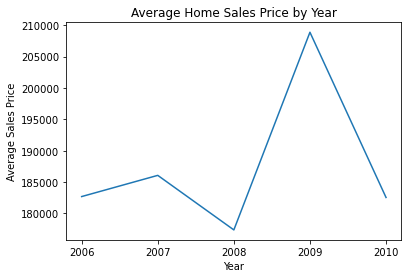

In [9]:
plt.plot(year_sales.index, year_sales)
plt.title('Average Home Sales Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales Price')
plt.xticks([2006, 2007, 2008, 2009, 2010])

In [454]:
# avg sale price in each month
month_sales = train.groupby(['YrSold', 'MoSold'])['SalePrice'].mean()
month_sales.head()git sta

YrSold  MoSold
2006.0  1.0       201090.000000
        2.0       194322.222222
        3.0       184982.200000
        4.0       174312.814815
        5.0       159412.837838
Name: SalePrice, dtype: float64

In [455]:
#creating index for the plot below
index = []
count = 0
for yr, mo in month_sales.index:
    
    date = pd.to_datetime(str(int(mo)) + '/' + str(int(yr))).strftime('%m/%Y')
    index.append(date)

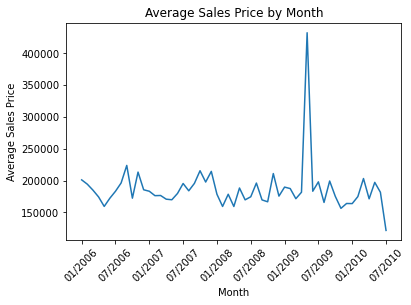

In [456]:
plt.plot(range(len(month_sales)), month_sales)
plt.title('Average Sales Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales Price')
plt.xticks(ticks = range(len(month_sales)), labels = index, rotation = 45)
plt.locator_params(axis = "x", nbins = 10)

In [457]:
# avg house price for each quality index
qual_index = train.groupby('OverallQual')['SalePrice'].mean()

Text(0, 0.5, 'Sale Price')

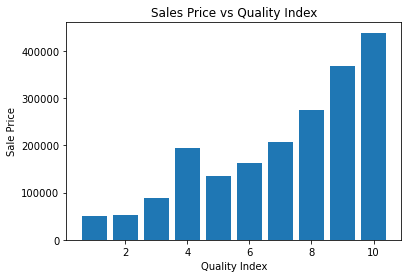

In [458]:
plt.bar(qual_index.index, qual_index)
plt.title('Sales Price vs Quality Index')
plt.xlabel('Quality Index')
plt.ylabel('Sale Price')

In [459]:
train['SalePrice'].describe()

count    1.458000e+03
mean     1.883768e+05
std      2.699760e+05
min      3.490000e+04
25%      1.300000e+05
50%      1.635000e+05
75%      2.140000e+05
max      1.000000e+07
Name: SalePrice, dtype: float64

In [460]:
sp = train[['SalePrice']]
bins = [np.linspace(0, 900000, num = 200)][0]
sp['bin'] = pd.cut(sp['SalePrice'].copy(), bins = bins, labels = bins[:-1])

<ipython-input-460-d01f178997ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['bin'] = pd.cut(sp['SalePrice'].copy(), bins = bins, labels = bins[:-1])


Text(0, 0.5, '# of Houses')

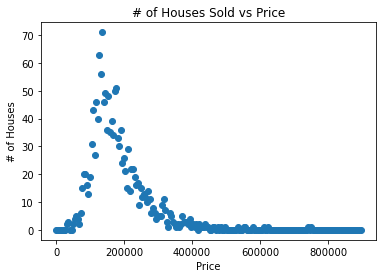

In [461]:
bin_values = sp['bin'].value_counts()
plt.scatter(bin_values.index, bin_values)
plt.title('# of Houses Sold vs Price')
plt.xlabel('Price')
plt.ylabel('# of Houses')
#plt.xlim(0, 400000)

In [462]:
bin_values

135678.391959799      71
126633.16582914571    63
131155.77889447234    56
176381.90954773867    51
171859.29648241206    50
                      ..
574371.8592964824      0
569849.2462311557      0
565326.6331658291      0
560804.0201005024      0
895477.3869346733      0
Name: bin, Length: 199, dtype: int64

## 2)

In [495]:
nh_avg = train.groupby('Neighborhood')['SalePrice'].mean() #avg house price by neighborhood

In [496]:
num_listings = train['Neighborhood'].value_counts()
nh_df['numlisting'] = num_listings

In [497]:
#transform data so each neighborhood is an entry
nh_df = train.groupby('Neighborhood').mean()
nh_df = nh_df.drop('Id', axis = 1)
nh_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,114.117647,47.142857,3398.176471,7.176471,5.000000,2005.235294,2005.764706,45.588235,196.000000,0.000000,...,147.294118,15.529412,0.000000,0.000000,8.470588,0.000000,0.000000,5.705882,2007.470588,194870.882353
Blueste,160.000000,24.000000,1625.000000,6.000000,6.000000,1980.000000,1980.000000,0.000000,183.000000,306.000000,...,155.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.500000,137500.000000
BrDale,160.000000,21.562500,1801.000000,5.687500,5.437500,1971.437500,1973.625000,307.562500,250.437500,0.000000,...,68.250000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.812500,2007.687500,104493.750000
BrkSide,49.741379,57.509804,7360.413793,5.051724,6.137931,1931.431034,1968.586207,7.396552,195.741379,11.155172,...,35.844828,25.344828,39.844828,2.482759,20.896552,0.000000,35.689655,6.206897,2007.672414,124834.051724
ClearCr,52.500000,83.461538,30875.750000,5.892857,5.678571,1966.571429,1983.750000,84.571429,620.892857,158.500000,...,188.821429,64.821429,32.535714,4.642857,34.928571,0.000000,32.142857,6.785714,2007.785714,212565.428571
CollgCr,43.456376,71.768000,9624.644295,6.651007,5.228188,1985.919463,1999.080537,98.540541,456.080537,26.617450,...,115.087248,52.067114,0.228188,2.610738,2.395973,0.000000,16.442953,6.120805,2007.798658,198284.335570
Crawfor,58.235294,71.804878,11809.686275,6.274510,6.588235,1941.549020,1979.196078,82.740000,466.803922,44.509804,...,52.568627,27.000000,46.176471,10.803922,30.176471,0.000000,49.019608,6.862745,2007.490196,210624.725490
Edwards,56.800000,68.217391,10218.650000,5.080000,5.440000,1955.970000,1975.110000,50.470000,424.460000,26.160000,...,70.770000,33.240000,26.380000,1.800000,15.250000,12.180000,16.000000,5.750000,2007.940000,236219.700000
Gilbert,58.227848,79.877551,11379.151899,6.556962,5.126582,1998.253165,1998.822785,42.051282,214.025316,0.000000,...,102.822785,42.632911,0.000000,10.974684,3.683544,0.000000,21.265823,6.594937,2007.556962,192854.506329


In [501]:
#normalize data
nh_normalized = (nh_df - nh_df.min()) / (nh_df.max() - nh_df.min())
nh_normalized

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,0.603653,0.363790,0.060620,0.714113,0.000000,0.994685,0.990330,0.108537,0.076775,0.000000,...,0.706372,0.153491,0.000000,0.000000,0.150285,0.000000,0.000000,0.000000,0.282353,0.406788
Blueste,0.971689,0.034665,0.000000,0.403629,0.629630,0.689875,0.373808,0.000000,0.057837,1.000000,...,0.751898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152068,0.900000,0.164429
BrDale,0.971689,0.000000,0.006017,0.321157,0.275463,0.586452,0.221262,0.732249,0.156077,0.000000,...,0.267839,0.079071,0.000000,0.000000,0.000000,0.000000,0.000000,0.055125,0.412500,0.024997
BrkSide,0.087270,0.511223,0.196077,0.153368,0.716475,0.103226,0.100689,0.017610,0.076398,0.036455,...,0.088056,0.250506,0.480371,0.226226,0.370745,0.000000,0.264103,0.259040,0.403448,0.110923
ClearCr,0.109398,0.880294,1.000000,0.375353,0.427249,0.527676,0.463542,0.201349,0.695738,0.517974,...,0.936764,0.640690,0.392252,0.423052,0.619700,0.000000,0.237857,0.558307,0.471429,0.481537
CollgCr,0.036856,0.713995,0.273485,0.575437,0.143674,0.761375,0.830385,0.234607,0.455648,0.086985,...,0.527690,0.514627,0.002751,0.237887,0.042509,0.000000,0.121678,0.214528,0.479195,0.421208
Crawfor,0.155402,0.714520,0.348185,0.476075,1.000000,0.225438,0.354571,0.196989,0.471269,0.145457,...,0.180839,0.266866,0.556706,0.984440,0.535389,0.000000,0.362745,0.598135,0.294118,0.473339
Edwards,0.143890,0.663500,0.293792,0.160831,0.277037,0.399624,0.256796,0.120160,0.409584,0.085490,...,0.281820,0.328542,0.318038,0.164014,0.270565,0.761902,0.118400,0.022810,0.564000,0.581463
Gilbert,0.155343,0.829325,0.333467,0.550618,0.079700,0.910350,0.824217,0.100116,0.103033,0.000000,...,0.459647,0.421380,0.000000,1.000000,0.065353,0.000000,0.157367,0.459669,0.334177,0.398270


In [498]:
# use pca to find most omportant features
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

Text(0.5, 1.0, 'Neighborhood Avg PCA Results with Normalization')

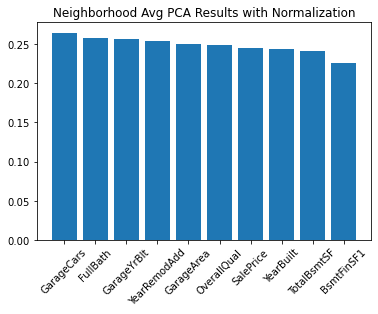

In [508]:
pca.fit(nh_normalized)
column_importance = []
for i, col in enumerate(nh_normalized):
    column_importance.append([col, pca.components_[0, i]])

column_importance = pd.DataFrame(column_importance, columns = ['col', 'pca_importance']).sort_values(by = 'pca_importance', ascending = False)[:10]
plt.bar(column_importance['col'], column_importance['pca_importance'])
plt.xticks(rotation = 45)
plt.title('Neighborhood Avg PCA Results with Normalization')

In [500]:
from sklearn.linear_model import Ridge

Text(0.5, 1.0, 'Average House Price by Neighborhood')

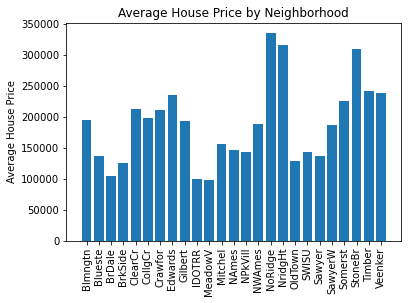

In [502]:
plt.bar(nh_avg.index, nh_avg)
plt.xticks(rotation = 90)
plt.ylabel('Average House Price')
plt.title('Average House Price by Neighborhood')

In [503]:
# top 3 neighborhoods: NoRidge, NridgHt, StoneBr

In [504]:
# run a ridge regression on neighborhood data
ridge = Ridge()
ridge_fit = ridge.fit(nh_normalized.drop('SalePrice', axis = 1), nh_normalized['SalePrice'])

Text(0.5, 1.0, 'Ridge Regression Coefficients')

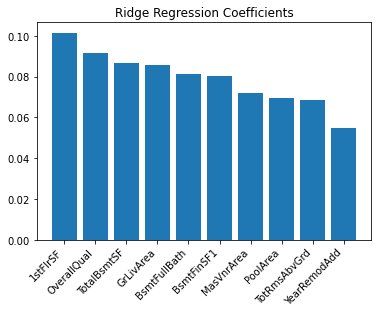

In [505]:
#ridge.coef_
coef_value = []
for i, col in enumerate(nh_normalized.drop('SalePrice', axis = 1)):
    #print(col, lasso.coef_[i])
    coef_value.append([col, ridge.coef_[i]])

coef_value = pd.DataFrame(coef_value, columns = ['col', 'coef']).sort_values(by = 'coef', ascending = False)[:10]

plt.bar(coef_value['col'], coef_value['coef'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ridge Regression Coefficients')

In [506]:
ridge.coef_

array([-0.0421291 ,  0.05466812,  0.01144878,  0.09143591, -0.02855429,
        0.00458641,  0.05468887,  0.07193216,  0.08013557, -0.01593416,
        0.03917183,  0.08683365,  0.10154429,  0.02750651, -0.03824789,
        0.08546059,  0.08125284, -0.06829931,  0.03061287, -0.01646309,
       -0.01346196, -0.06397168,  0.06828783,  0.05255633,  0.02089047,
        0.03017426,  0.03828754,  0.01130487, -0.00105224,  0.04076637,
       -0.00398284,  0.04294276,  0.06963866, -0.09679053,  0.05096945,
       -0.0198053 ])

## 3)

In [473]:
train2 = pd.get_dummies(train) #one hot encode all string columns
train2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0,0,0,1,0,0,0,0,1,0


In [474]:
train2_dropped = train2.dropna() #drop na values for now

In [475]:
import xgboost as xgb #import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [476]:
#split training data into x and y values
X = np.array(train2_dropped.loc[:, train2_dropped.columns != 'SalePrice'].copy()) 
y = np.array(train2_dropped['SalePrice'].copy())

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [478]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [8, 12, 16, 20]
}

# create xgboost model
xgb_model = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator = xgb_model, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid_mse.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [479]:
grid_mse.best_params_ # best parameters that we will create final model with

{'colsample_bytree': 0.5, 'max_depth': 20, 'n_estimators': 100}

In [480]:
#foramtting testing values to be same as training
test2 = pd.get_dummies(test)
test_cols = test2.columns
for col in train2.columns:
    if col not in test_cols:
        test2[col] = pd.Series(np.zeros(len(test2)))
test2 = test2[train2.columns]

In [481]:
xgb_final = xgb.XGBRegressor(colsample_by_tree = .5, n_estimators = 200, max_depth = 8)
final_fit = xgb_final.fit(X, y)
train_predictions = final_fit.predict(X)
new_predictions = final_fit.predict(np.array(test2.loc[:, test2.columns != 'SalePrice']))

[16:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_by_tree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [482]:
rmse = np.sqrt(np.mean((train_predictions - y) ** 2))
r_squared = 1 - sum((train_predictions - y) ** 2) / sum((train_predictions - np.mean(train_predictions)) ** 2)

In [483]:
rmse #rmse of final model on all training data

4.2128089569330625

In [484]:
r_squared # r^2 value of model on all training data

0.9999999998091225

In [485]:
test2['predicted price'] = new_predictions

In [486]:
# house id and house price for top 10 predicted house prices
test2.sort_values(by = 'predicted price', ascending = False)[['Id', 'predicted price']][:10]

,Id,predicted price
608,2069,9.993242e+06
638,2099,9.989383e+06
570,2031,9.988607e+06
832,2293,5.244954e+05
19,1480,5.238381e+05
1168,2629,5.084167e+05
200,1661,5.006085e+05
1222,2683,4.996776e+05
211,1672,4.880547e+05
1191,2652,4.807593e+05
